In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

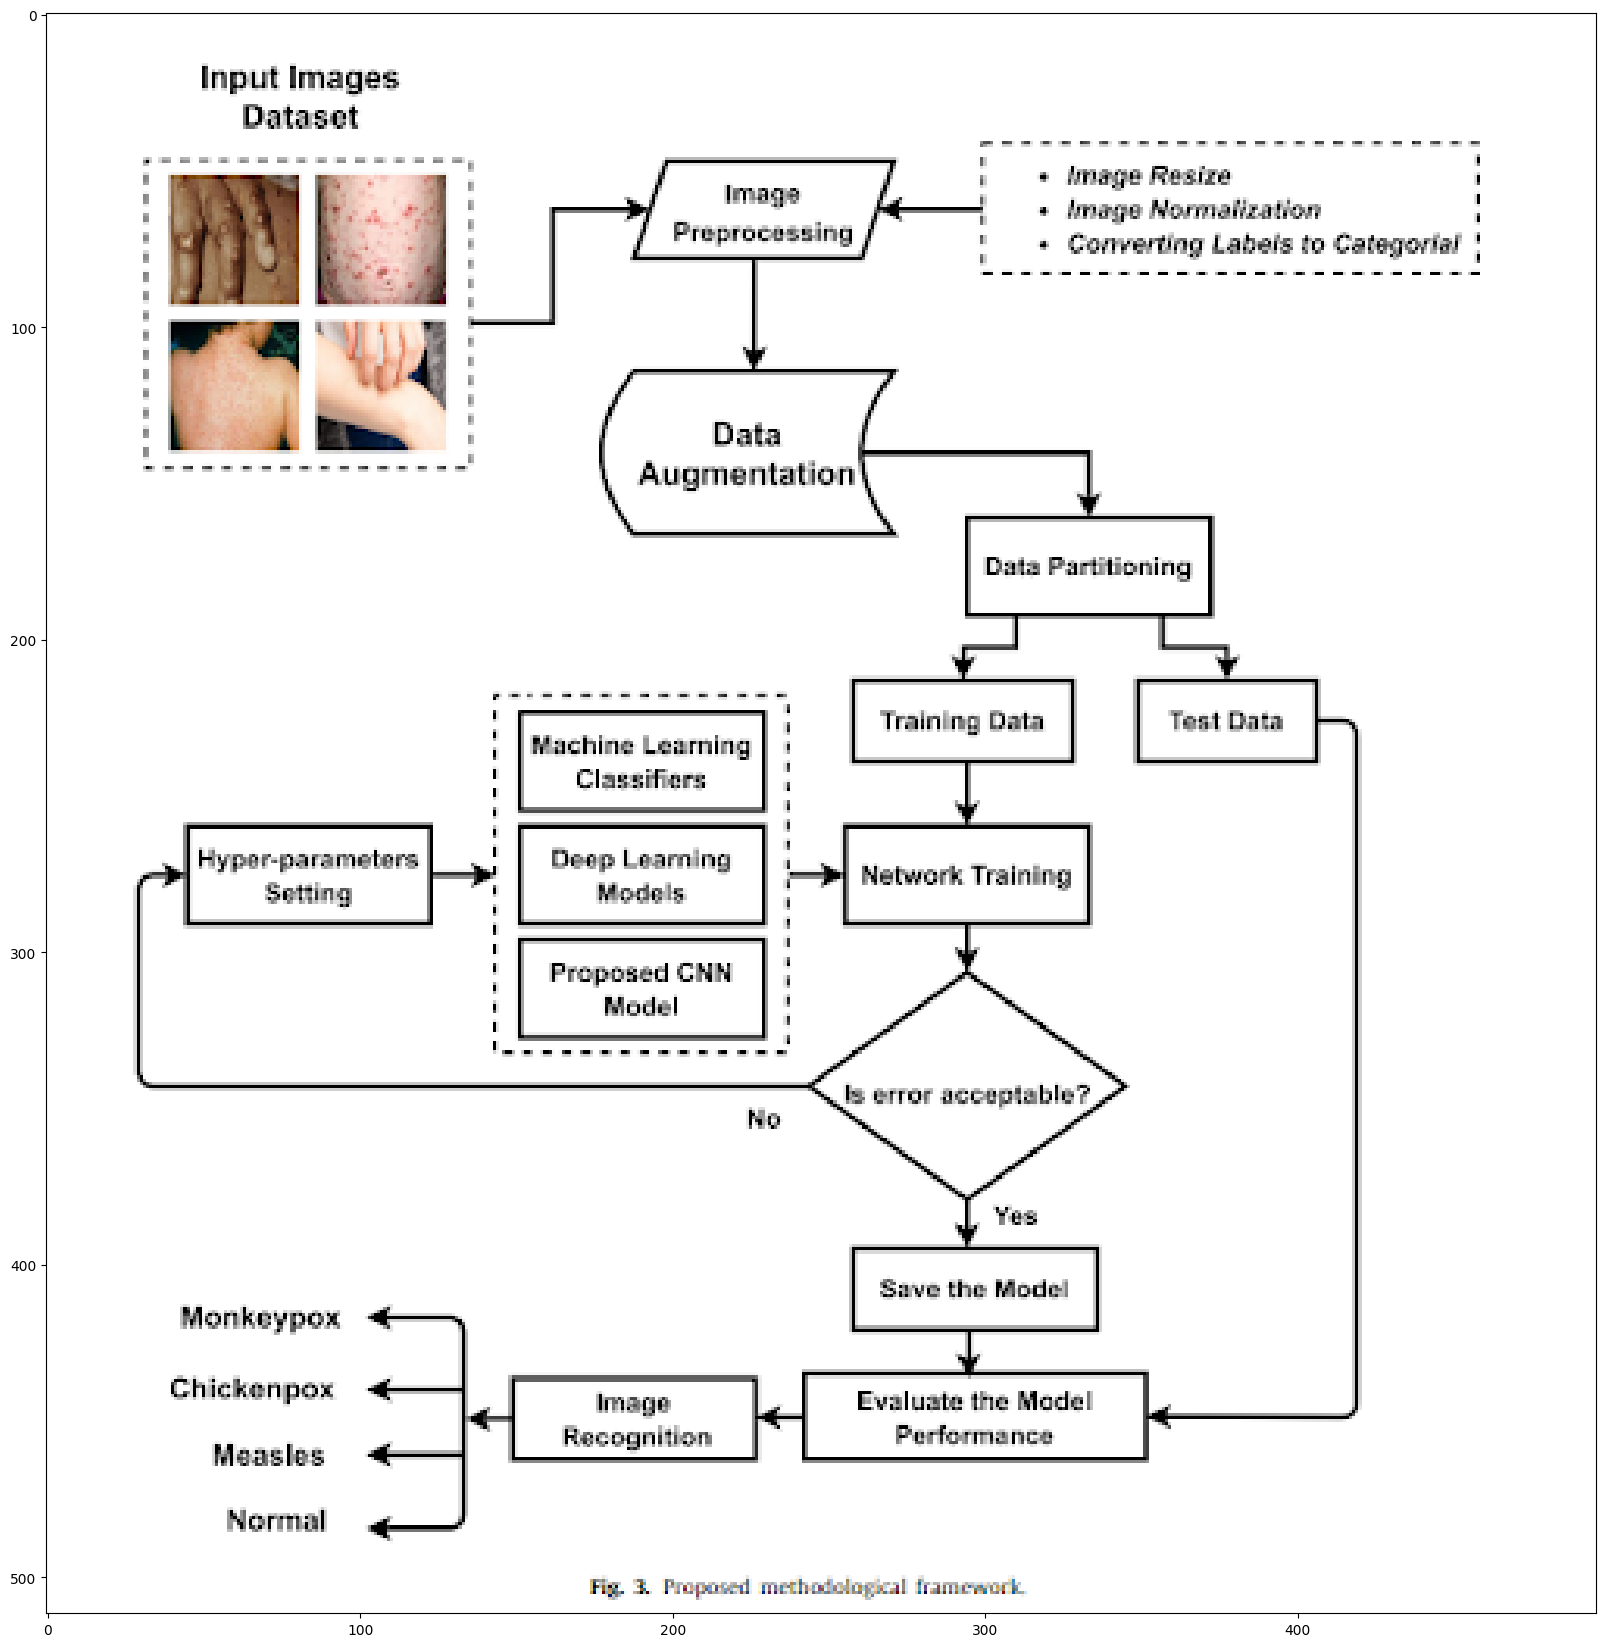

In [2]:
plt.figure(figsize=(20,30))
plt.imshow(plt.imread("/kaggle/input/combined-mpox/unnamed (1).png"))

In [3]:
MSD=pd.read_csv("/kaggle/input/combined-mpox/MSD.csv")

In [4]:
MSD_pd = pd.get_dummies(MSD, columns=['labels'], drop_first=False, dtype=int)
print(f"One-Hot Encoded Data using Pandas:\n")
MSD_pd

One-Hot Encoded Data using Pandas:



filename                                              paths  \
0     monkeypox235.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
1     monkeypox273.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
2     monkeypox270.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
3     monkeypox132.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
4     monkeypox258.png  /kaggle/input/monkeypoxskinimagedataset/Monkey...   
...                ...                                                ...   
1520     CWP_41_02.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
1521     CWP_38_02.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
1522     CWP_41_01.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
1523     CWP_33_05.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   
1524     CWP_39_01.jpg  /kaggle/input/mpox-skin-lesion-dataset-version...   

     source  labels_CWP  labels_HFMD  labels_chpox  labels_measles  \
0      MSID           0            0             0               0   
1      MSID           0            0             0               0   
2      MSID           0            0             0               0   
3      MSID           0            0             0               0   
4      MSID           0            0             0               0   
...     ...         ...          ...           ...             ...   
1520   MSLD           1            0             0               0   
1521   MSLD           1            0             0               0   
1522   MSLD           1            0             0               0   
1523   MSLD           1            0             0               0   
1524   MSLD           1            0             0               0   

      labels_mpox  labels_normal  
0               1              0  
1               1              0  
2               1              0  
3               1              0  
4               1              0  
...           ...            ...  
1520            0              0  
1521            0              0  
1522            0              0  
1523            0              0  
1524            0              0  

[1525 rows x 9 columns]

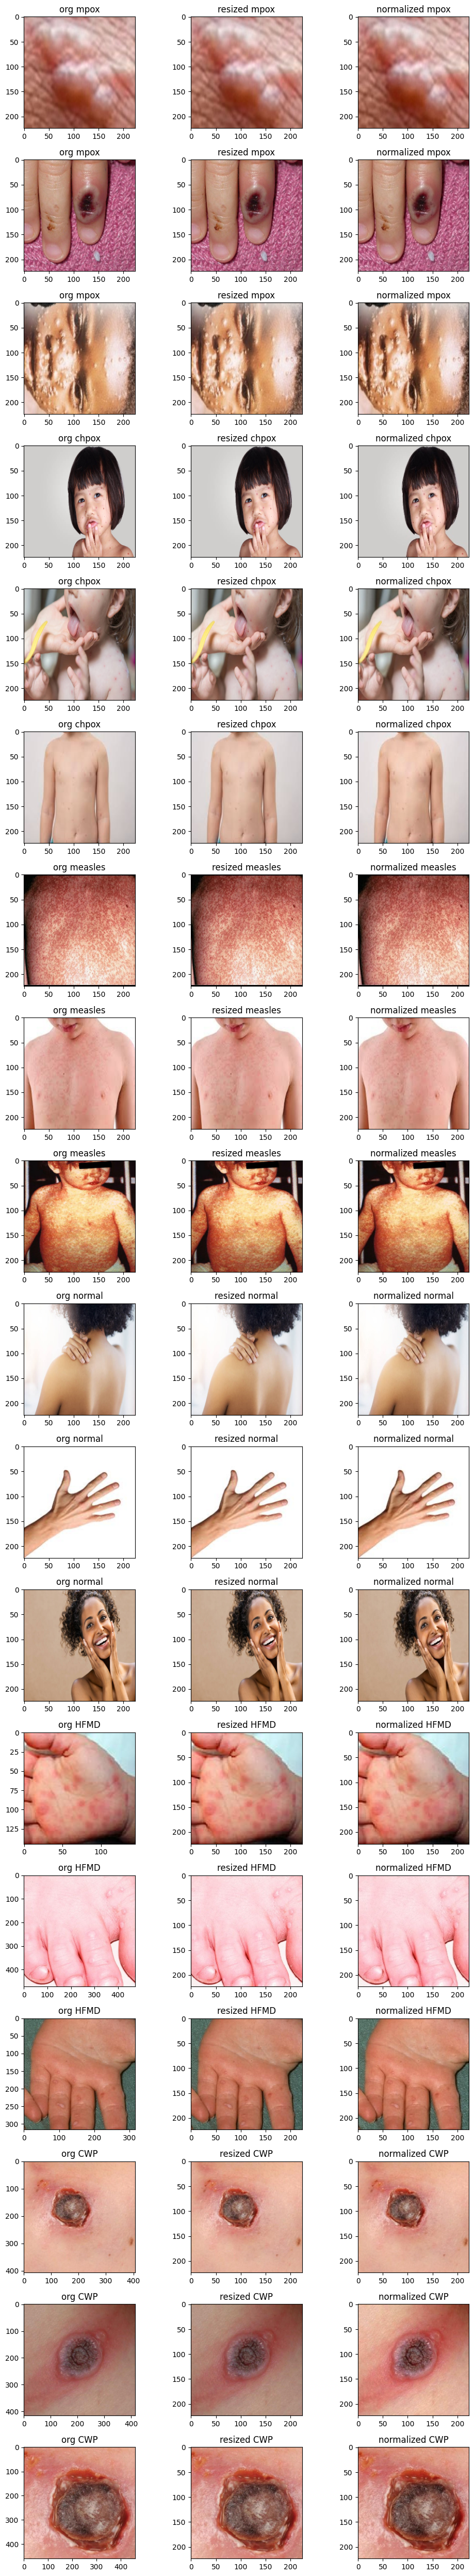

In [5]:
x=MSD.groupby("labels").head(3)
x.reset_index(inplace=True)
plt.figure(figsize=(10,50))
for i in range(0,len(x)):
    name=x["labels"][i]
    img=cv2.imread(x["paths"][i])
    plt.subplot(18,3,i*3+1)
    plt.imshow(plt.imread(x["paths"][i]))
    plt.title(f"org {name}")
    resized=cv2.resize(img,(224,224),interpolation=cv2.INTER_NEAREST)
    
    plt.subplot(18,3,i*3+2)
    plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    plt.title(f"resized {name}")
    cv2.imwrite(f"/kaggle/working/{name}{i}.jpg",resized)
    image = cv2.imread(f'/kaggle/working/{name}{i}.jpg')
    image = image.astype('float32')
    image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    
    plt.subplot(18,3,i*3+3)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #plt.imshow(plt.imread(f"/kaggle/working/{name}{i}.jpg"))
    plt.title(f"normalized {name}")
plt.tight_layout()
plt.show()

In [7]:
resized

array([[[119, 141, 212],
        [117, 139, 211],
        [116, 138, 210],
        ...,
        [149, 174, 230],
        [152, 175, 231],
        [153, 173, 230]],

       [[120, 142, 214],
        [118, 140, 212],
        [117, 139, 211],
        ...,
        [147, 172, 228],
        [153, 176, 232],
        [154, 174, 231]],

       [[120, 142, 214],
        [118, 140, 212],
        [117, 138, 213],
        ...,
        [143, 166, 222],
        [148, 171, 227],
        [151, 171, 228]],

       ...,

       [[169, 185, 238],
        [164, 181, 232],
        [161, 178, 227],
        ...,
        [121, 136, 205],
        [122, 138, 205],
        [128, 144, 211]],

       [[176, 192, 245],
        [172, 189, 240],
        [166, 183, 232],
        ...,
        [134, 150, 219],
        [130, 147, 214],
        [129, 146, 213]],

       [[167, 183, 236],
        [172, 189, 240],
        [175, 192, 241],
        ...,
        [121, 140, 208],
        [125, 144, 211],
        [127, 146, 213]]

In [8]:
image

array([[[0.4390244 , 0.53658533, 0.8292683 ],
        [0.4227642 , 0.5203252 , 0.81300807],
        [0.4227642 , 0.5203252 , 0.81300807],
        ...,
        [0.5813008 , 0.6747967 , 0.902439  ],
        [0.5813008 , 0.6626016 , 0.8943089 ],
        [0.58943087, 0.67073166, 0.902439  ]],

       [[0.45528454, 0.5447154 , 0.83739835],
        [0.44308943, 0.5325203 , 0.82520324],
        [0.4390244 , 0.52845526, 0.8211382 ],
        ...,
        [0.5731707 , 0.6666666 , 0.8943089 ],
        [0.5813008 , 0.6626016 , 0.8943089 ],
        [0.5934959 , 0.6747967 , 0.90650403]],

       [[0.45934957, 0.53658533, 0.8414634 ],
        [0.4512195 , 0.52845526, 0.8333333 ],
        [0.44715446, 0.5243902 , 0.8292683 ],
        ...,
        [0.54878044, 0.6422764 , 0.86991864],
        [0.5609756 , 0.6422764 , 0.8739837 ],
        [0.58536583, 0.6626016 , 0.8943089 ]],

       ...,

       [[0.64634144, 0.7154471 , 0.9227642 ],
        [0.6300813 , 0.699187  , 0.90650403],
        [0.60975605, 0

In [ ]:
os.makedirs("/kaggle/working/mpox", exist_ok=True)
os.makedirs("/kaggle/working/chpox", exist_ok=True)
os.makedirs("/kaggle/working/CWP", exist_ok=True)
os.makedirs("/kaggle/working/measles", exist_ok=True)
os.makedirs("/kaggle/working/normal", exist_ok=True)
os.makedirs("/kaggle/working/HFMD", exist_ok=True)
for i in range(0,2):
    name=MSD["labels"][i]
    img=cv2.imread(MSD["paths"][i])
    resized=cv2.resize(img,(224,224),interpolation=cv2.INTER_NEAREST)
    cv2.imwrite(f"/kaggle/working/{name}/{name}{i}.jpg",resized)


# augmentation

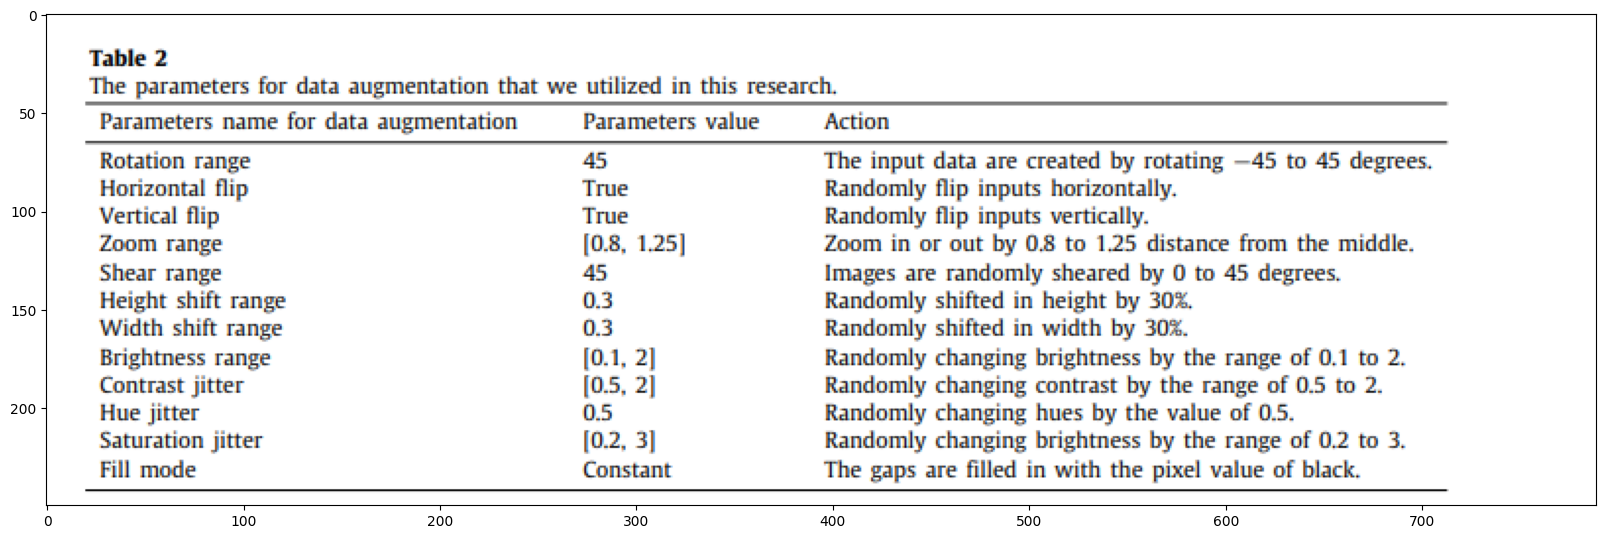

In [9]:
plt.figure(figsize=(20,30))
plt.imshow(plt.imread("/kaggle/input/combined-mpox/unnamed.png"))

In [11]:
def resize_image(image):
    return tf.image.resize(image, [224, 224])

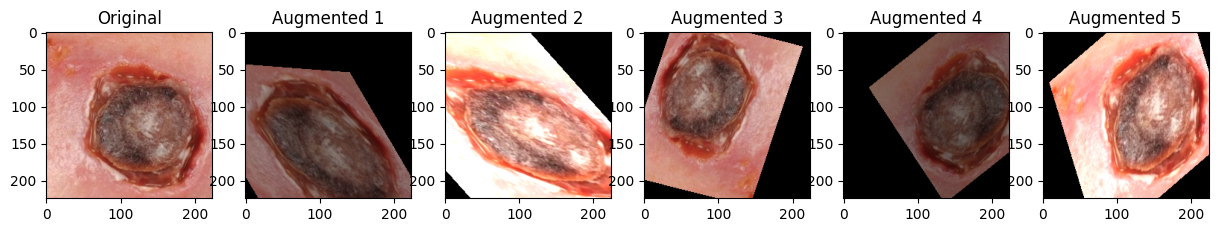

In [12]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=45,
    zoom_range=[0.8, 1.25],
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.1, 2],
    fill_mode='constant',
    rescale=1.0/255.0,
    preprocessing_function=resize_image 
)

img = tf.keras.preprocessing.image.load_img("/kaggle/working/CWP17.jpg")
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  


augmented_images = datagen.flow(img_array, batch_size=1)


fig, axs = plt.subplots(1, 6, figsize=(15, 5))
axs[0].imshow(img)
axs[0].set_title("Original")
for i in range(1, 6):
    aug_img = next(augmented_images)[0]
    axs[i].imshow(aug_img)
    axs[i].set_title(f"Augmented {i}")
plt.show()




using aug to oversample small classes

In [13]:
save_dir = "/kaggle/working/augmented_images/CWP"
if not os.path.exists(save_dir): 
    os.makedirs(save_dir)

for idx, row in MSD[MSD["labels"] == "CWP"].iterrows():
    img_path = row["paths"]
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.resize(img_array, [224, 224])
    img_array = np.expand_dims(img_array, axis=0) 
    augmented_images = datagen.flow(img_array, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='jpeg')
    for i in range(5): 
        batch = next(augmented_images) 
        filename = f"aug_{i}_{os.path.basename(img_path)}"
        new_row = {'paths': os.path.join(save_dir, filename), 'labels': 'CWP'} 
        MSD.loc[len(MSD)] = new_row

print("Augmentation and saving completed.")


Augmentation and saving completed.


CHpox

In [14]:
save_dir = "/kaggle/working/augmented_images/CHpox"
if not os.path.exists(save_dir): 
    os.makedirs(save_dir)

for idx, row in MSD[MSD["labels"] == "chpox"].iterrows():
    img_path = row["paths"]
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.resize(img_array, [224, 224])
    img_array = np.expand_dims(img_array, axis=0) 
    augmented_images = datagen.flow(img_array, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='jpeg')
    for i in range(5): 
        batch = next(augmented_images) 
        filename = f"aug_{i}_{os.path.basename(img_path)}"
        new_row = {'paths': os.path.join(save_dir, filename), 'labels': 'chpox'} 
        MSD.loc[len(MSD)] = new_row
print("Augmentation and saving completed.")

Augmentation and saving completed.


measles

In [15]:
save_dir = "/kaggle/working/augmented_images/measles"
if not os.path.exists(save_dir): 
    os.makedirs(save_dir)

for idx, row in MSD[MSD["labels"] == "measles"].iterrows():
    img_path = row["paths"]
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.resize(img_array, [224, 224])
    img_array = np.expand_dims(img_array, axis=0) 
    augmented_images = datagen.flow(img_array, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='jpeg')
    for i in range(5): 
        batch = next(augmented_images) 
        filename = f"aug_{i}_{os.path.basename(img_path)}"
        new_row = {'paths': os.path.join(save_dir, filename), 'labels': 'measles'} 
        MSD.loc[len(MSD)] = new_row

print("Augmentation and saving completed.")

Augmentation and saving completed.


In [16]:
save_dir = "/kaggle/working/augmented_images/HFMD"
if not os.path.exists(save_dir): 
    os.makedirs(save_dir)

for idx, row in MSD[MSD["labels"] == "HFMD"].iterrows():
    img_path = row["paths"]
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.resize(img_array, [224, 224])
    img_array = np.expand_dims(img_array, axis=0) 
    augmented_images = datagen.flow(img_array, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='jpeg')
    for i in range(5): 
        batch = next(augmented_images) 
        filename = f"aug_{i}_{os.path.basename(img_path)}"
        new_row = {'paths': os.path.join(save_dir, filename), 'labels': 'HFMD'} 
        MSD.loc[len(MSD)] = new_row

print("Augmentation and saving completed.")

Augmentation and saving completed.


<Axes: ylabel='count'>

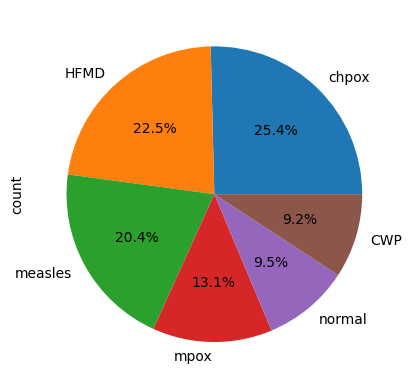

In [17]:
MSD["labels"].value_counts().plot.pie(autopct='%1.1f%%')

In [18]:
MSD["labels"].value_counts()

labels
chpox      1092
HFMD        966
measles     876
mpox        563
normal      407
CWP         396
Name: count, dtype: int64